# Prédiction de Salaires - Régression Linéaire Multiple

## Objectif
Ce notebook présente une analyse complète de régression linéaire multiple pour prédire les salaires des employés.

## Plan d'analyse
1. **Exploration des données**
2. **Préparation des données**
3. **Modélisation**
   - Baseline avec DummyRegressor
   - Régression linéaire simple
4. **Réugularisation avec GridSearchCV**
   - Ridge Regression (L2)
   - Lasso Regression (L1)
6. **Résumé et Comparaison Finale**

In [1]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Chargement et Exploration des Données

In [2]:
# Chargement des données

# TO DO : Charger le dataset employee_salaries.csv dans un DataFrame pandas et afficher les 5 premières lignes ainsi que la shape du dataset
import pandas as pd

csv_path = "/Users/diegoguenancia/Documents/ML B2/ml-git-exercise/notebooks/linear-regression-exercise/data/employee_salaries.csv"

df = pd.read_csv(csv_path)

display(df.head())
print(f"Shape du dataset: {df.shape}")

,age,experience,education_years,heures_semaine,nb_projets,evaluation_performance,anciennete_entreprise,niveau_education,departement,poste,ville,secteur,taille_entreprise,salaire_annuel
0,38,5,0,39,3.0,2.9,2,Bac,Marketing,Senior,Paris,Services,Grande Entreprise,95600.0
1,29,0,1,35,1.0,4.6,0,Bac,Finance,Junior,Paris,Services,ETI,41500.0
2,25,1,0,37,0.0,4.4,0,Bac,R&D,Junior,Autres,Santé,Grande Entreprise,44300.0
3,25,1,4,40,3.0,7.4,0,Master,Ventes,Junior,Toulouse,Services,ETI,57100.0
4,37,5,1,41,7.0,5.0,0,Bac,IT,Senior,Paris,Tech,ETI,128000.0


Shape du dataset: (10000, 14)


In [3]:
# Informations sur le dataset et statistiques descriptives

# TO DO : Afficher les informations statistiques sur le dataset ainsi que le nombre de valeurs manquantes par colonne
# Informations statistiques (toutes colonnes)
display(df.describe(include='all').T)

# Nombre de valeurs manquantes par colonne
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.to_frame(name='valeurs_manquantes'))

# (Optionnel) Informations générales du DataFrame
print("Infos du DataFrame :")
df.info()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,10000.0,NaN,NaN,NaN,34.7944,7.658381,22.0,29.0,35.0,40.0,63.0
experience,10000.0,NaN,NaN,NaN,3.2202,3.20611,0.0,1.0,2.0,5.0,30.0
education_years,10000.0,NaN,NaN,NaN,3.794,2.353193,0.0,2.0,4.0,5.0,9.0
heures_semaine,10000.0,NaN,NaN,NaN,39.1935,3.390488,35.0,37.0,39.0,41.0,60.0
nb_projets,9900.0,NaN,NaN,NaN,3.978182,2.89398,0.0,2.0,3.0,6.0,19.0
evaluation_performance,9800.0,NaN,NaN,NaN,5.839439,1.226777,1.0,5.0,5.8,6.7,10.0
anciennete_entreprise,10000.0,NaN,NaN,NaN,0.5641,1.080096,0.0,0.0,0.0,1.0,11.0
niveau_education,10000,4,Licence,3719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departement,10000,6,IT,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poste,10000,5,Junior,4109,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,valeurs_manquantes
evaluation_performance,200
nb_projets,100
age,0
experience,0
education_years,0
heures_semaine,0
anciennete_entreprise,0
niveau_education,0
departement,0
poste,0


Infos du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   experience              10000 non-null  int64  
 2   education_years         10000 non-null  int64  
 3   heures_semaine          10000 non-null  int64  
 4   nb_projets              9900 non-null   float64
 5   evaluation_performance  9800 non-null   float64
 6   anciennete_entreprise   10000 non-null  int64  
 7   niveau_education        10000 non-null  object 
 8   departement             10000 non-null  object 
 9   poste                   10000 non-null  object 
 10  ville                   10000 non-null  object 
 11  secteur                 10000 non-null  object 
 12  taille_entreprise       10000 non-null  object 
 13  salaire_annuel          10000 non-null  float64
dtypes: float64(3), int

In [4]:
# Séparation des variables numériques et catégorielles

# TO DO : créer deux listes qui séparent les variables numériques et catégorielles
import numpy as np

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Variables numériques:", numerical_features)
print("Variables catégorielles:", categorical_features)

Variables numériques: ['age', 'experience', 'education_years', 'heures_semaine', 'nb_projets', 'evaluation_performance', 'anciennete_entreprise', 'salaire_annuel']
Variables catégorielles: ['niveau_education', 'departement', 'poste', 'ville', 'secteur', 'taille_entreprise']


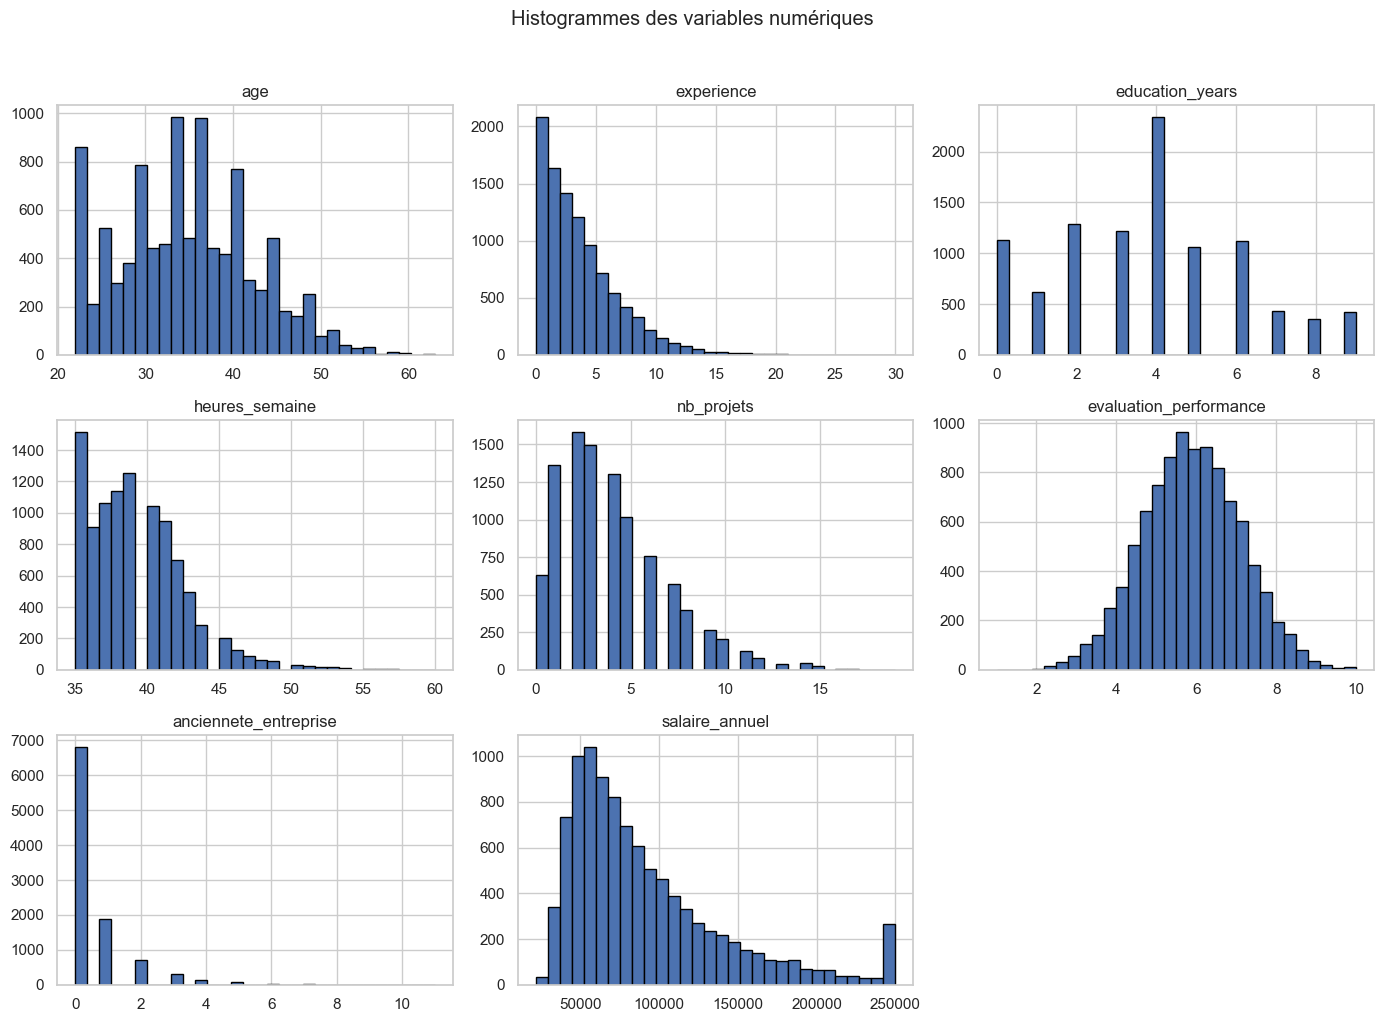

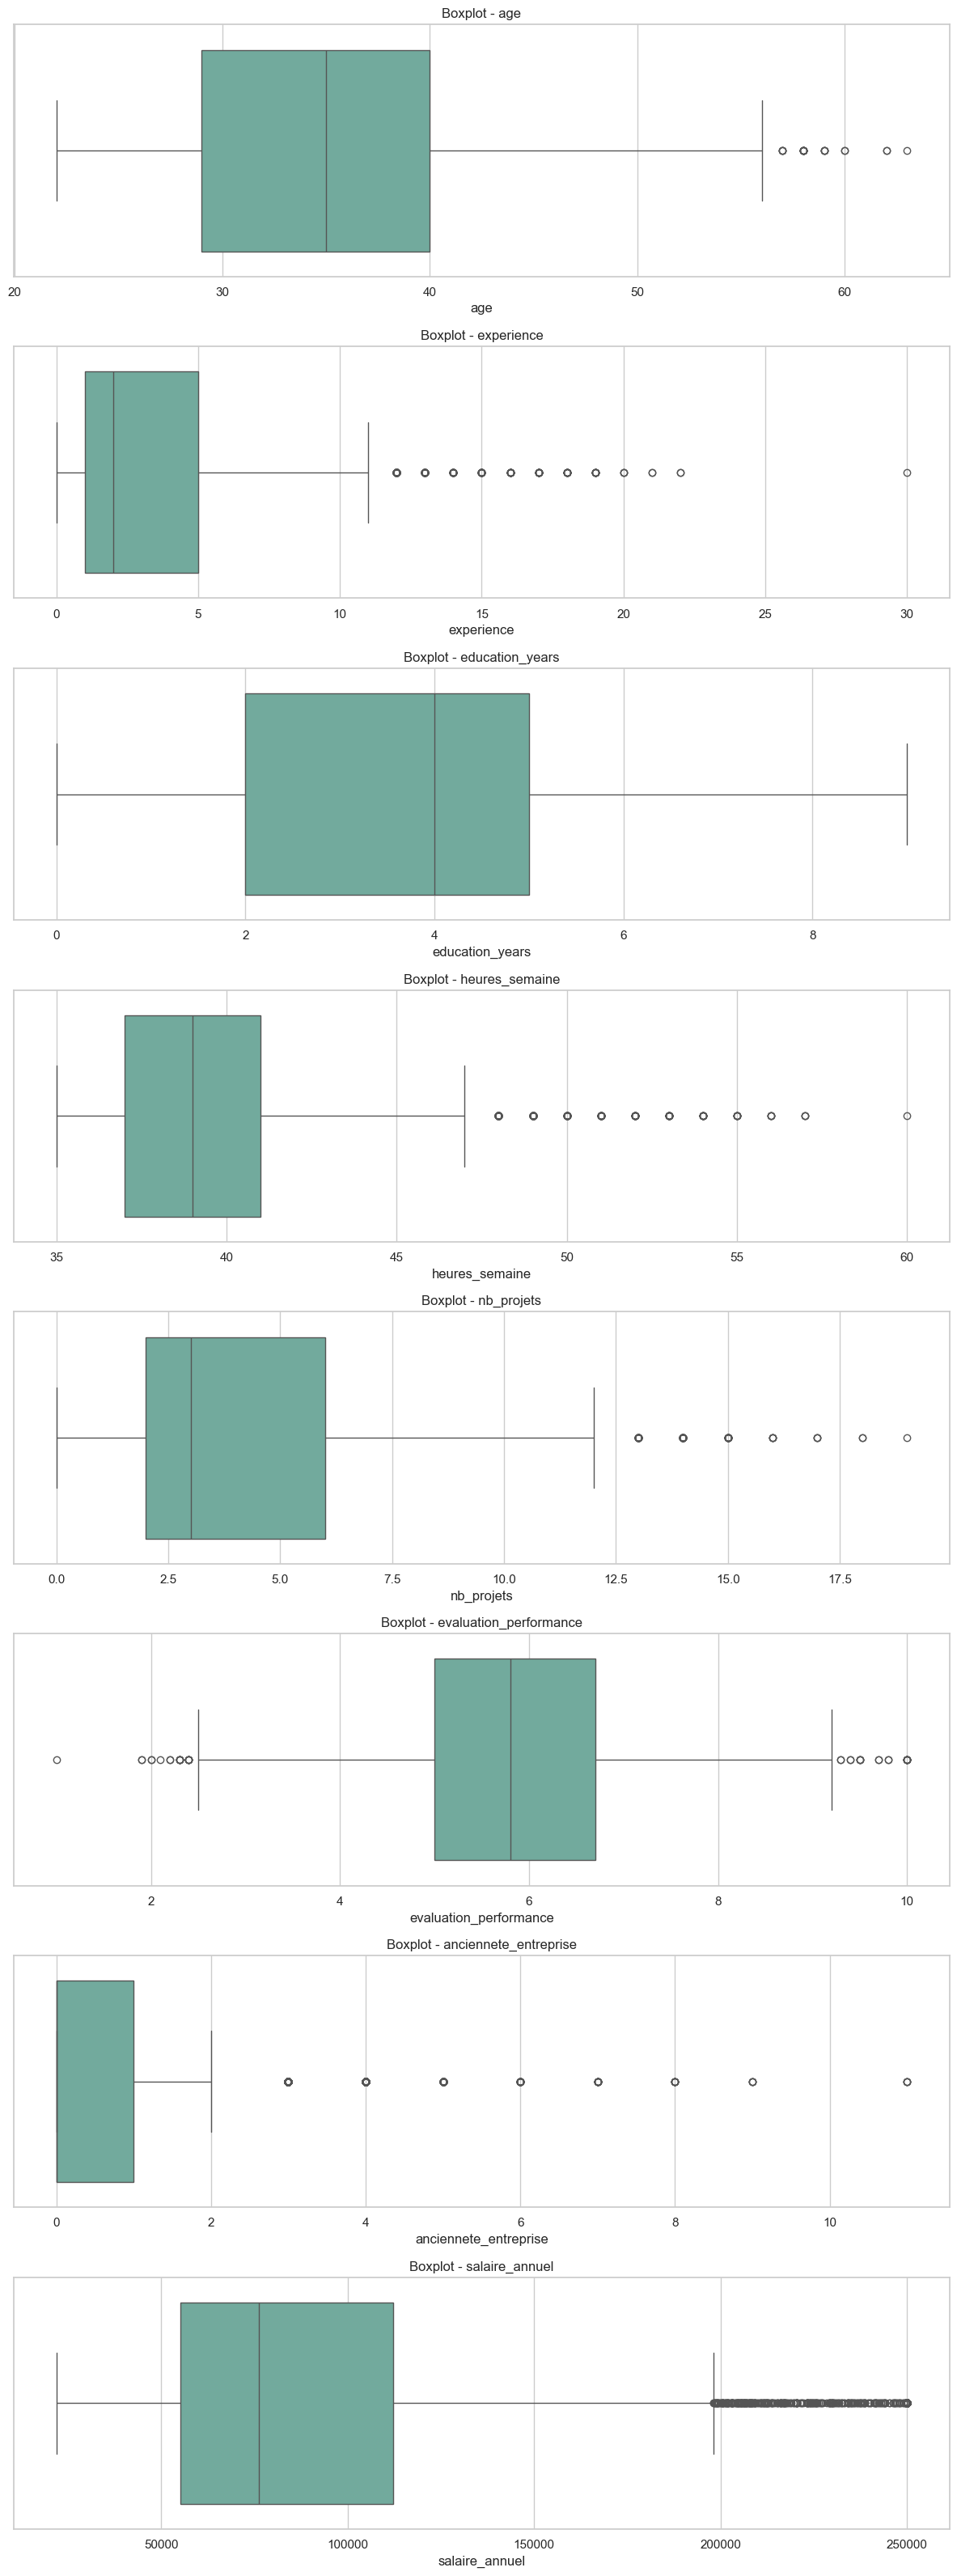

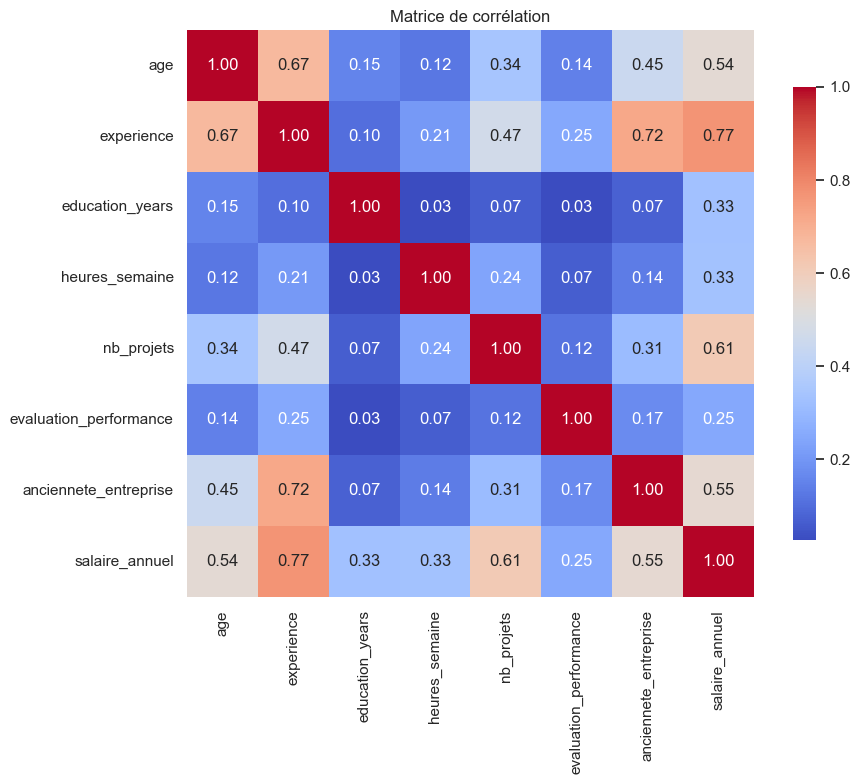

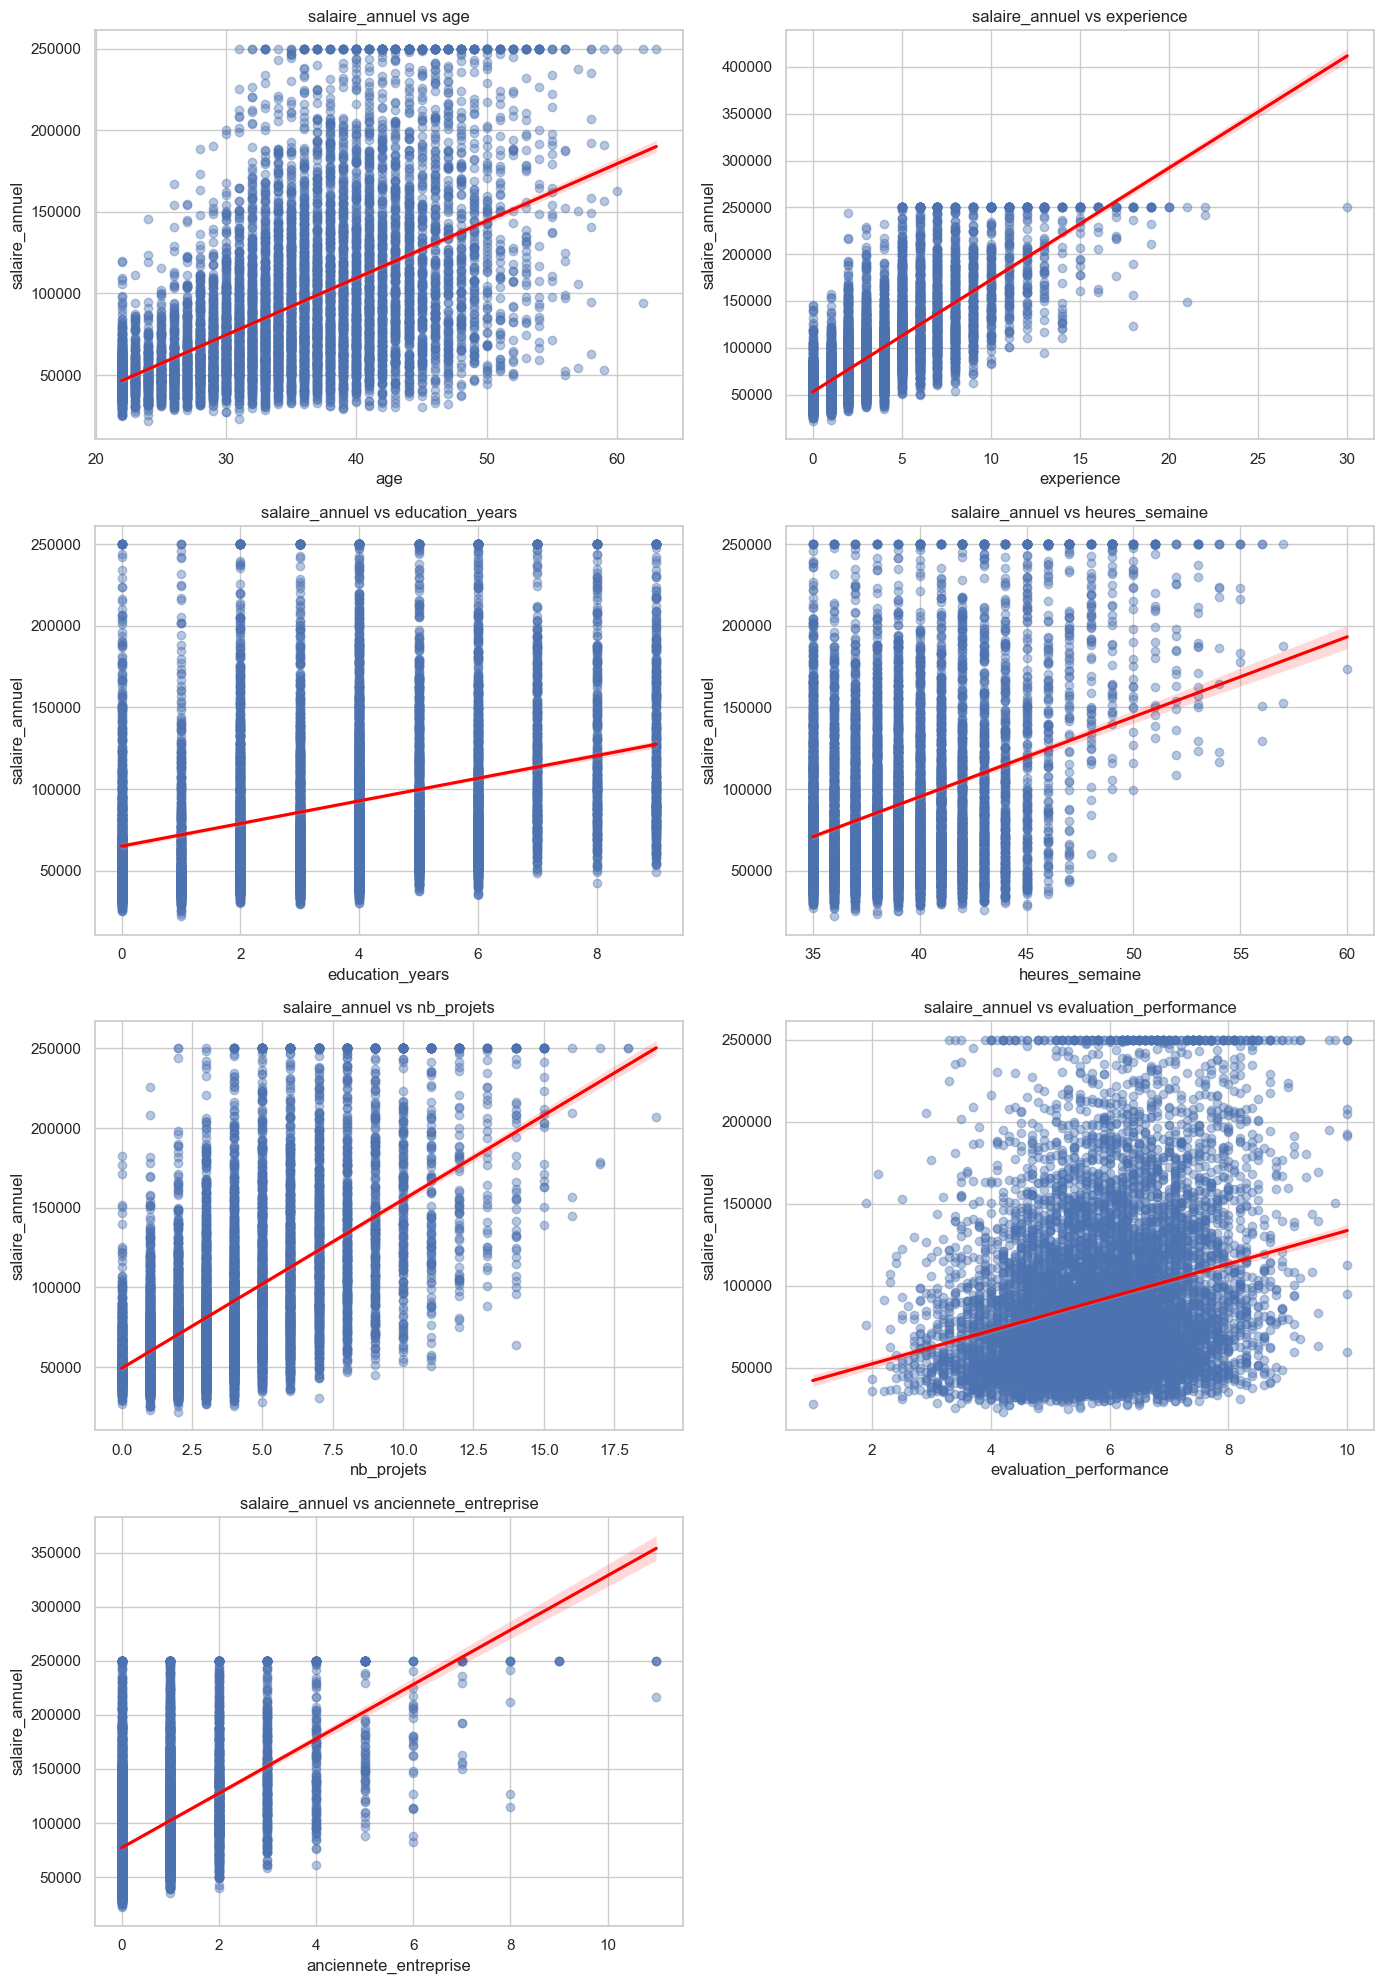

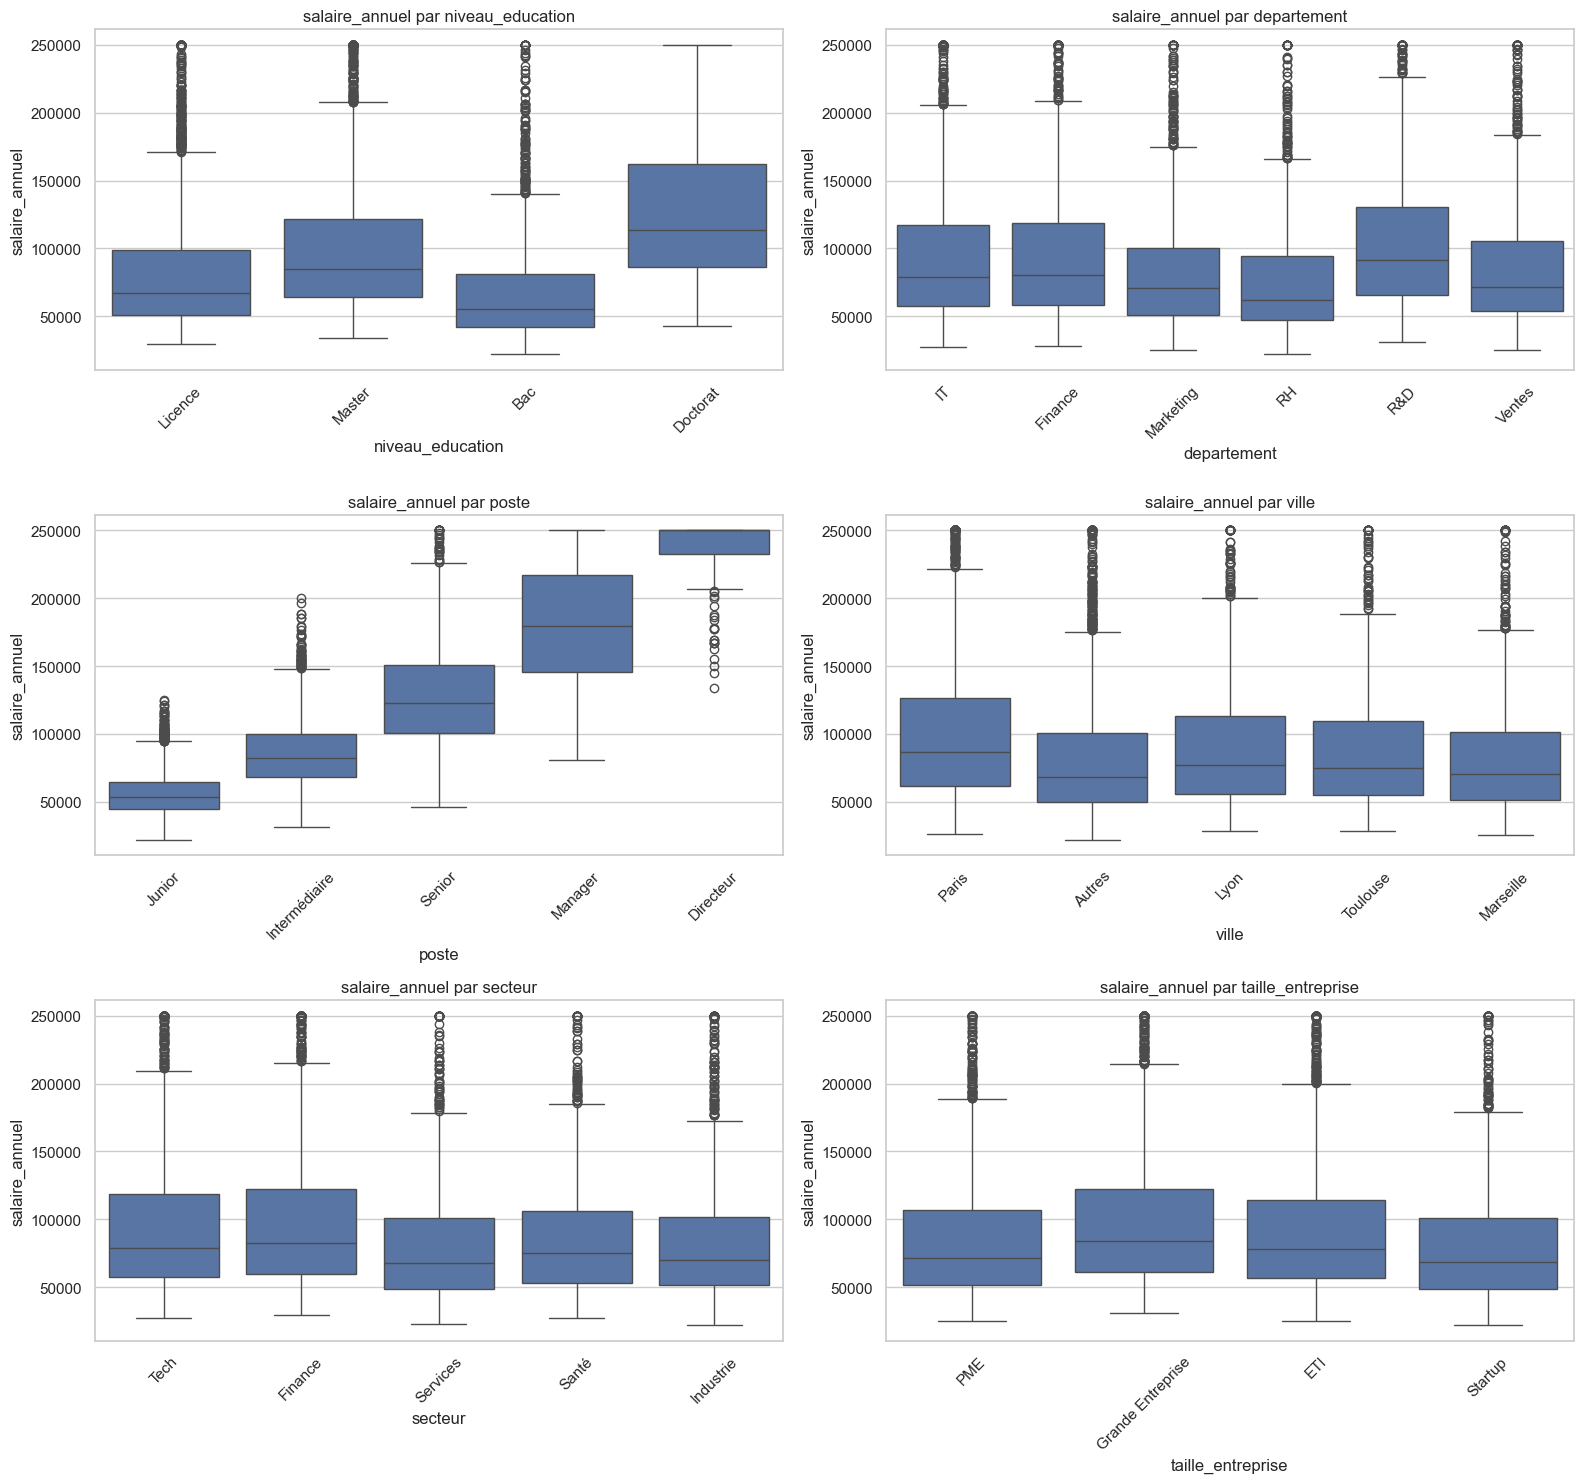

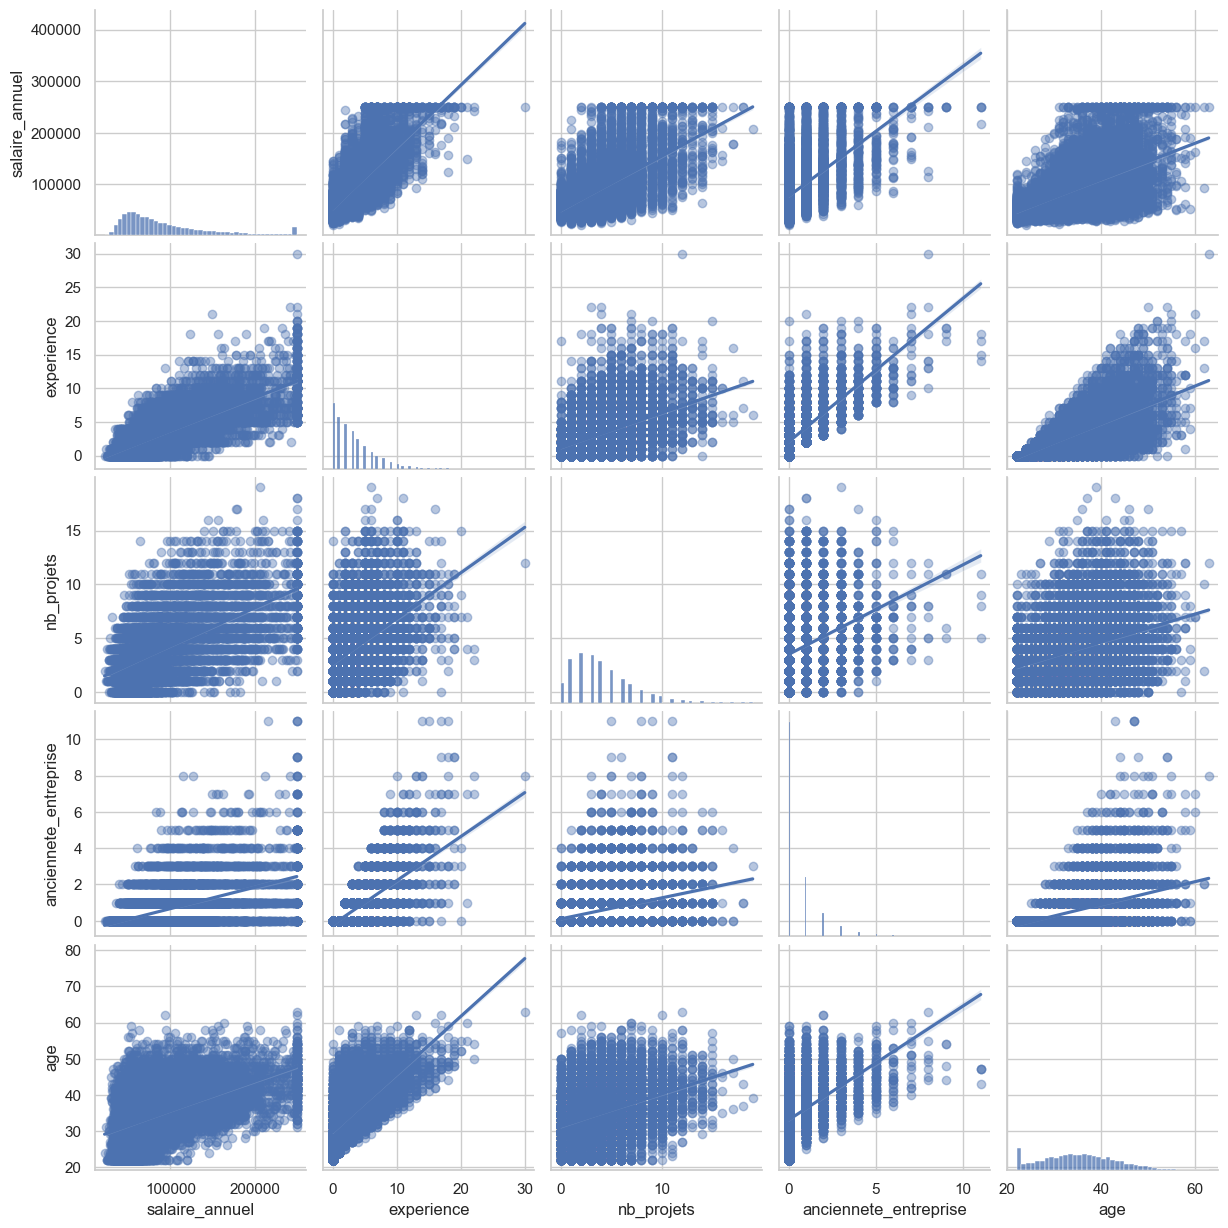

In [6]:
# Analyse des données

# TO DO : Analyser les données avec des visualisations appropriées (histogrammes, boxplots, heatmap de corrélation, etc.) 
# pour comprendre la distribution des variables et leurs relations avec la variable cible 'salaire'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# Listes de variables
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Colonne cible
target_col = "salaire_annuel"
assert target_col in df.columns, f"Colonne cible '{target_col}' introuvable"

# 1) Histogrammes des variables numériques
_ = df[numerical_features].hist(figsize=(14, 10), bins=30, edgecolor="black")
plt.suptitle("Histogrammes des variables numériques", y=1.02)
plt.tight_layout()
plt.show()

# 2) Boxplots des variables numériques
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(12, 4*len(numerical_features)))
if len(numerical_features) == 1:
    axes = [axes]
for ax, col in zip(axes, numerical_features):
    sns.boxplot(x=df[col], ax=ax, color="#69b3a2")
    ax.set_title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

# 3) Heatmap de corrélation (numérique)
plt.figure(figsize=(10, 8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# 4) Relations avec la cible (numériques -> scatter + régression)
num_without_target = [c for c in numerical_features if c != target_col]
n = len(num_without_target)
cols = 2
rows = (n + cols - 1) // cols if n > 0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
axes = axes.flatten() if n > 1 else [axes]
for ax, col in zip(axes, num_without_target):
    sns.regplot(data=df, x=col, y=target_col, scatter_kws={"alpha":0.4}, line_kws={"color":"red"}, ax=ax)
    ax.set_title(f"{target_col} vs {col}")
for ax in axes[n:]:
    ax.remove()
plt.tight_layout()
plt.show()

# 5) Relations 'salaire_annuel' vs catégorielles (boxplots, niveaux limités)
max_levels = 20
cat_limited = [c for c in categorical_features if df[c].nunique() <= max_levels]

n = len(cat_limited)
cols = 2
rows = (n + cols - 1) // cols if n > 0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(16, 5*rows))
axes = axes.flatten() if n > 1 else [axes]

for ax, col in zip(axes, cat_limited):
    order = df[col].value_counts().index
    sns.boxplot(data=df, x=col, y=target_col, order=order, ax=ax)
    ax.set_title(f"{target_col} par {col}")
    ax.tick_params(axis="x", rotation=45)
for ax in axes[n:]:
    ax.remove()
plt.tight_layout()
plt.show()

# 6) Pairplot des variables les plus corrélées avec 'salaire_annuel'
if target_col in numerical_features:
    top_corr = (
        df[numerical_features]
        .corr()[target_col]
        .drop(target_col)
        .abs()
        .sort_values(ascending=False)
        .head(4)
        .index.tolist()
    )
    cols_for_pair = [target_col] + top_corr
    sns.pairplot(df[cols_for_pair], kind="reg", plot_kws={"scatter_kws": {"alpha": 0.4}})

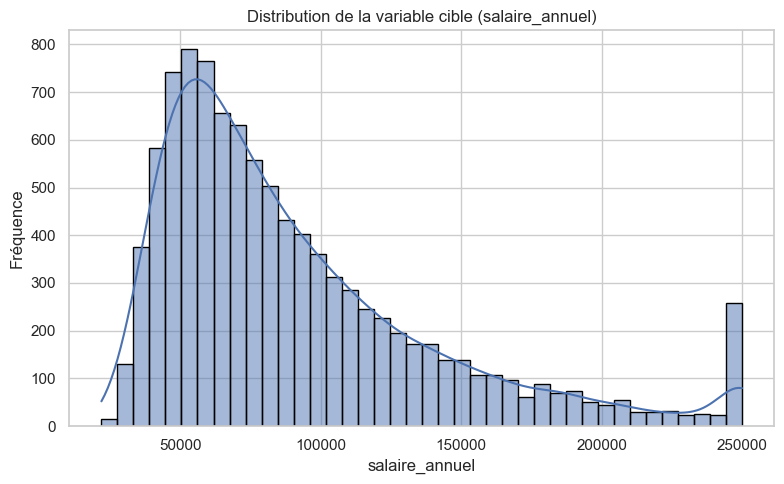

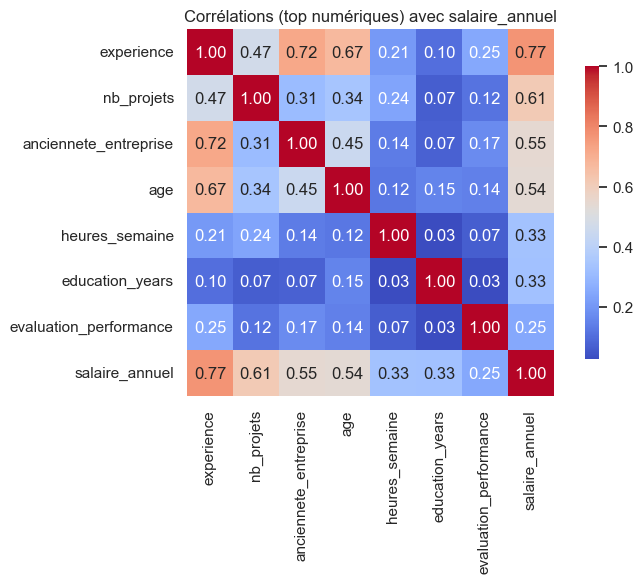

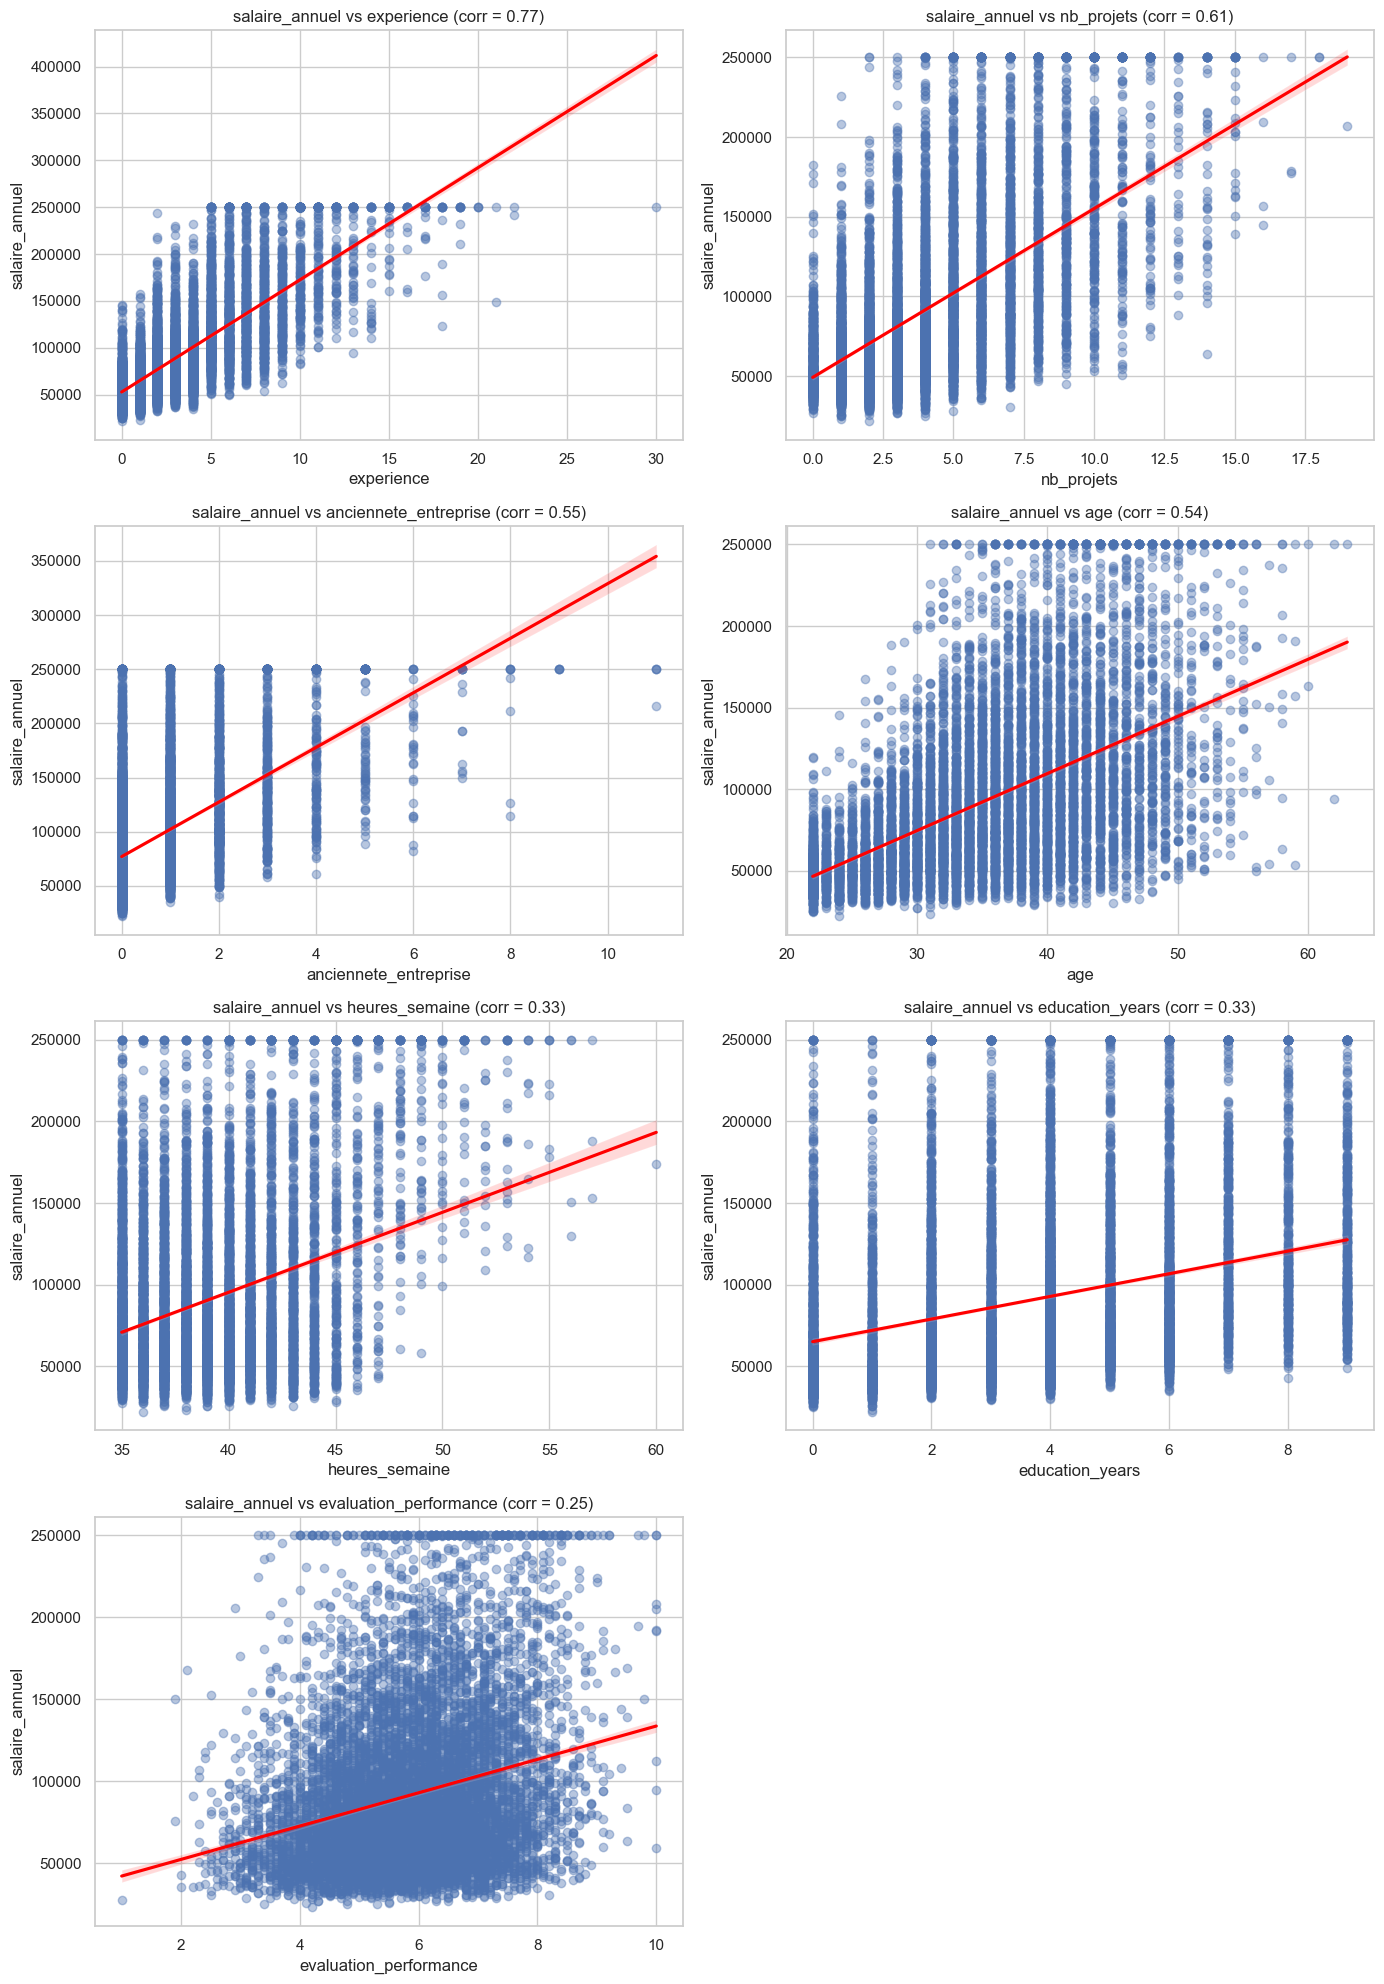

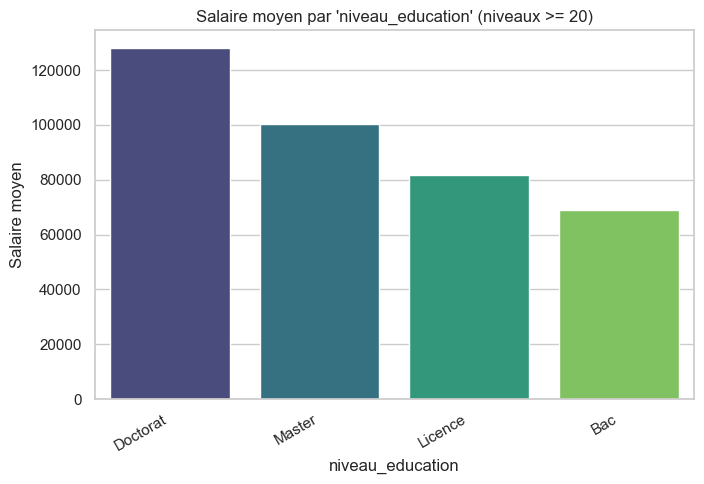

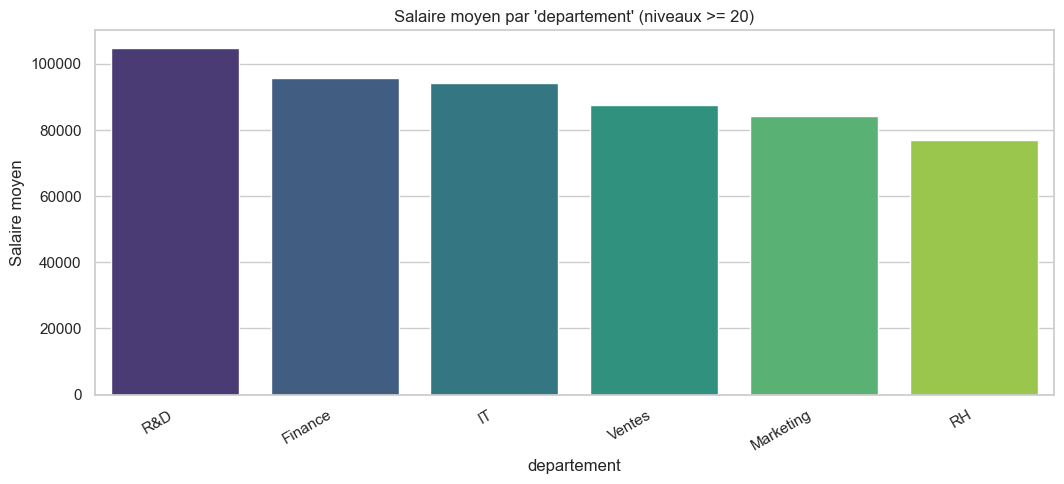

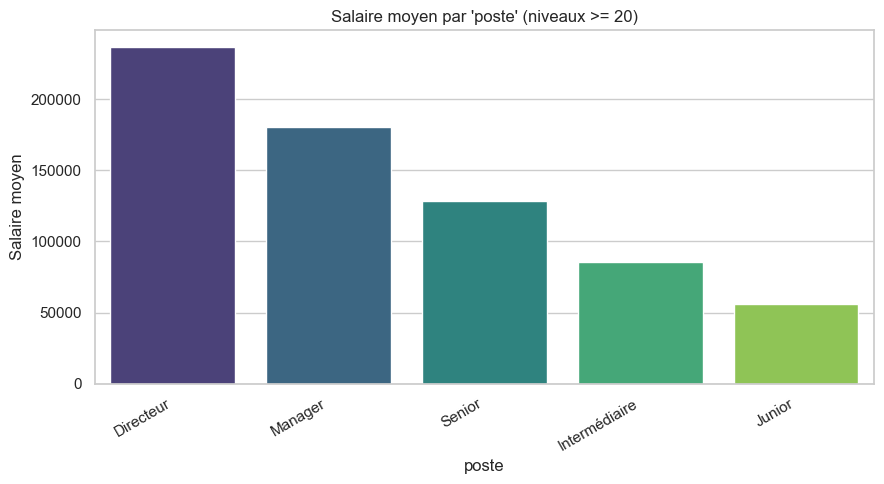

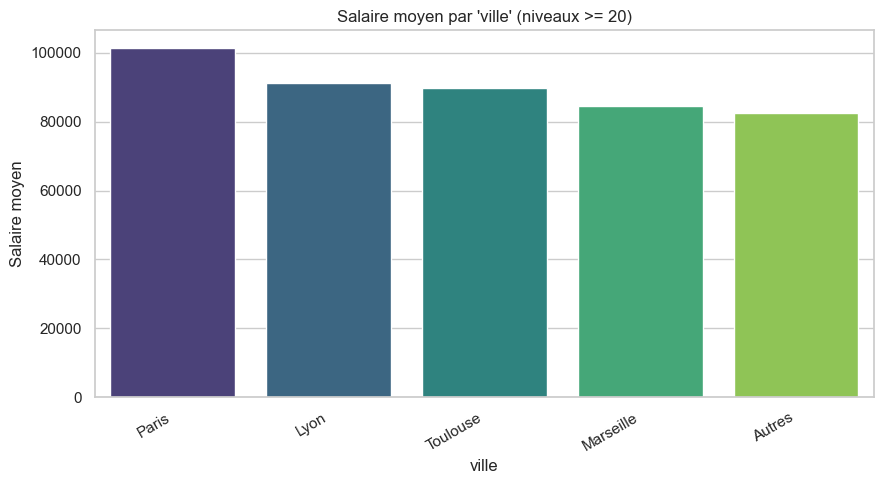

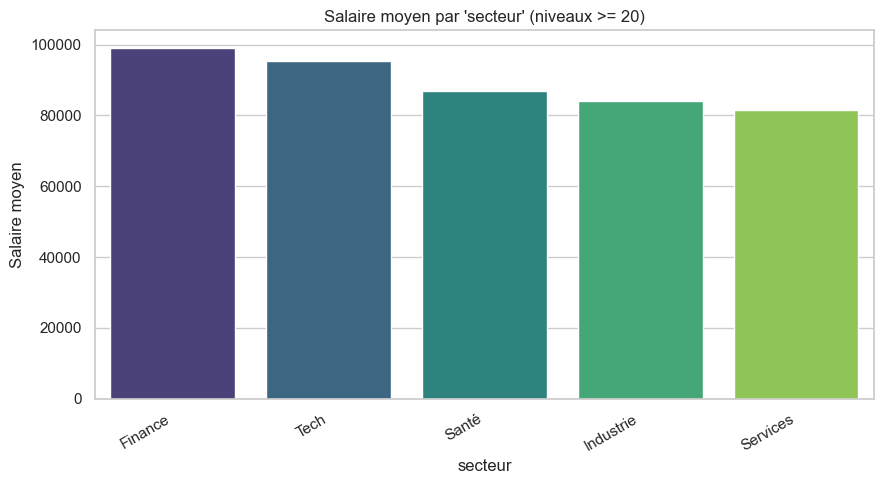

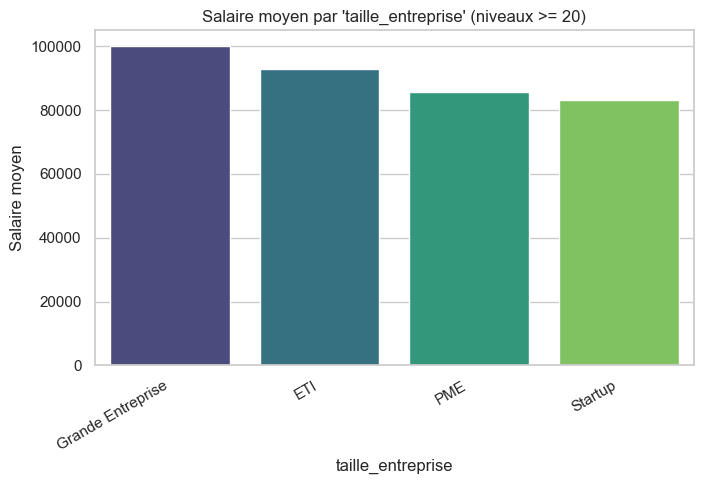

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# Définition de la cible
target_col = "salaire_annuel"
assert target_col in df.columns, f"Colonne cible '{target_col}' introuvable"

# Détection des types
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# 1) Distribution de la cible (pertinent pour vérifier skew, outliers)
plt.figure(figsize=(8, 5))
sns.histplot(df[target_col].dropna(), bins=40, kde=True, edgecolor="black")
plt.title("Distribution de la variable cible (salaire_annuel)")
plt.xlabel("salaire_annuel")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

# 2) Corrélations numériques avec la cible (top 8) — sélection de features candidates
num_for_corr = [c for c in numerical_features if c != target_col]
corr_with_target = (
    df[num_for_corr + [target_col]]
    .corr(numeric_only=True)[target_col]
    .drop(target_col)
    .sort_values(key=lambda s: s.abs(), ascending=False)
)
top_num = corr_with_target.head(8).index.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[top_num + [target_col]].corr(numeric_only=True),
    annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8}, square=True
)
plt.title("Corrélations (top numériques) avec salaire_annuel")
plt.tight_layout()
plt.show()

# 3) Scatter + ligne de régression pour les top numériques (relations linéaires, outliers, non-linéarités)
n = len(top_num)
if n > 0:
    cols = 2
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
    axes = axes.flatten() if n > 1 else [axes]
    for ax, col in zip(axes, top_num):
        sns.regplot(
            data=df, x=col, y=target_col,
            scatter_kws={"alpha": 0.4}, line_kws={"color": "red"}, ax=ax
        )
        ax.set_title(f"{target_col} vs {col} (corr = {corr_with_target[col]:.2f})")
    for ax in axes[n:]:
        ax.remove()
    plt.tight_layout()
    plt.show()

# 4) Catégorielles pertinentes: moyenne du salaire par modalité (limitées en cardinalité)
max_levels = 10
min_count_per_level = 20  # évite les modalités trop rares
cat_limited = []
for c in categorical_features:
    nunique = df[c].nunique(dropna=True)
    if 2 <= nunique <= max_levels:
        cat_limited.append(c)

# Barplots: moyenne cible par catégorie (tri par moyenne décroissante)
for c in cat_limited:
    agg = (
        df[[c, target_col]]
        .dropna(subset=[c, target_col])
        .groupby(c)[target_col]
        .agg(["mean", "count"])
        .query("count >= @min_count_per_level")
        .sort_values("mean", ascending=False)
    )
    if len(agg) == 0:
        continue
    plt.figure(figsize=(min(12, 1.8*len(agg)), 5))
    sns.barplot(x=agg.index, y=agg["mean"], palette="viridis")
    plt.title(f"Salaire moyen par '{c}' (niveaux >= {min_count_per_level})")
    plt.ylabel("Salaire moyen")
    plt.xlabel(c)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

## 2. Préparation des Données

### 2.1 Séparation des features et de la cible

In [9]:
# Séparation des features (X) et de la cible (y)

# Séparer les données en dataset de features (X) et dataset de cible (y)

In [10]:
# Division en ensemble d'entraînement et de test (80/20)

# Spliter les données en ensembles d'entraînement et de test (80/20) et utiliser l'arribut random_state=42 

### 2.2 Preprocessing Pipeline

Nous allons créer un pipeline de preprocessing qui:
1. Impute les valeurs manquantes pour les variables numériques
2. Applique le scaling sur les variables numériques
3. Applique le one-hot encoding sur les variables catégorielles

In [18]:
# TO DO : implémenter des stratégie de prétraitement des données numériques et catégorielles en utilisant ColumnTransformer et Pipeline

## 3. Modélisation

### 3.1 Modèle de Base - DummyRegressor

In [11]:
# TO DO : Entrainer un modèle DummyRegressor, qui servira de baseline, et évaluer ses performances sur l'ensemble de test

### 3.2 Régression Linéaire Simple

In [ ]:
# TO DO : Entrainer un modèle de régression linaire

In [12]:
# TO DO : afficher les valeurs prédites par le modèle linéaire vs les valeurs réelles du dataset de test

In [16]:
# TO DO : afficher les valeurs des coefficients du modèle linéaire

## 4. Régularisation avec GridSearchCV

In [ ]:
# TO DO : Entrainer un modèle Ridge en testant les hyerparamètres suivants : 
#    - 'alpha': np.logspace(-3, 2, 20),
#    - 'selection': ['cyclic', 'random']
# Afficher les résultats de la cross validation et les performances sur l'ensemble de test 

In [17]:
# TO DO : Entrainer un modèle Ridge en testant les hyerparamètres suivants : 
#    - 'alpha': np.logspace(-3, 3, 20),
#    - 'solver': ['auto', 'svd', 'cholesky', 'lsqr']
# Afficher les résultats de la cross validation et les performances sur l'ensemble de test

## 5. Résumé et Comparaison Finale

In [19]:
# TO : Afficher pour chaque modèle (dummy, linéaire, ridge, lasso) les performances sur l'ensemble d'entrainement et de test et conclure
# sur le choix du modèle et sa capacité de généralisation